### Tuberculosis WHO

#### General setup.
___


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 8]

<br>

#### Load the data set.
___


In [3]:
# Load the data set
tb = pd.read_csv('../Data/tuberculosis.csv')
tb.head()

,country,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
tb.tail()

,country,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
5764,ZW,2004,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,366.0,...,NaN,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,ZW,2005,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,295.0,...,NaN,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,ZW,2006,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,348.0,...,NaN,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,ZW,2007,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,292.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN
5768,ZW,2008,NaN,NaN,127.0,614.0,0.0,3316.0,704.0,263.0,...,NaN,NaN,145.0,840.0,0.0,2890.0,467.0,174.0,105.0,0.0


There are several issues with the data set: 
* Missing values
* Confusing names (for example, m04 means male 0-4 years old)

In [5]:
tb.columns

Index(['country', 'year', 'm04', 'm514', 'm014', 'm1524', 'm2534', 'm3544',
       'm4554', 'm5564', 'm65', 'mu', 'f04', 'f514', 'f014', 'f1524', 'f2534',
       'f3544', 'f4554', 'f5564', 'f65', 'fu'],
      dtype='object')

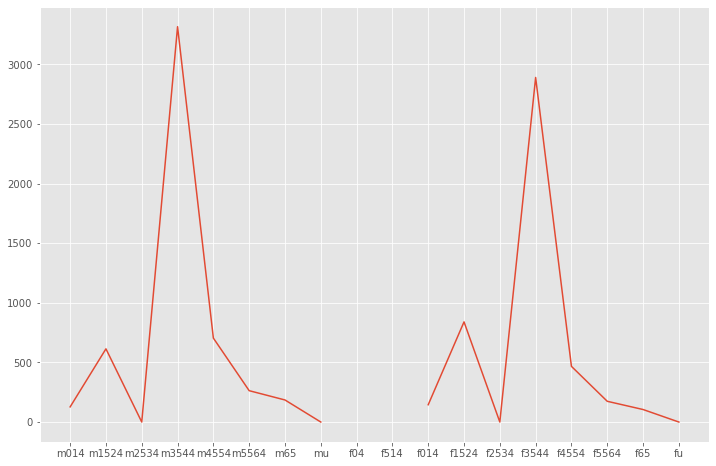

In [6]:
# Plot the columns from m04 to fu for the last row in the data set.
plt.plot(tb.loc[5768, 'm04':'fu'])
plt.show()

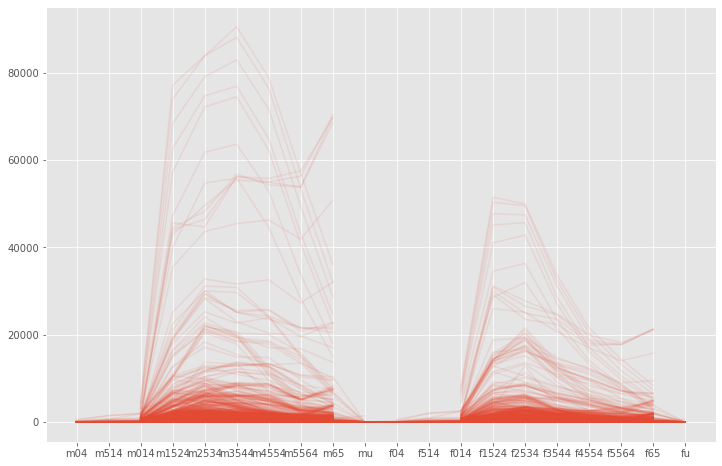

In [7]:
# And now the same as above for all rows
for _, row in tb.iterrows():
    plt.plot(row['m04':'fu'], color='C0', alpha=0.1)

<br>

#### Data cleaning.
___


In [8]:
# Melt columns from m04 to fu into a sex and cases columns
tb_melt = tb.melt(tb.columns[:2], tb.columns[2:], 'sex_age', 'cases')
tb_melt

,country,year,sex_age,cases
0,AD,1989,m04,NaN
1,AD,1990,m04,NaN
2,AD,1991,m04,NaN
3,AD,1992,m04,NaN
4,AD,1993,m04,NaN
...,...,...,...,...
115375,ZW,2004,fu,NaN
115376,ZW,2005,fu,NaN
115377,ZW,2006,fu,NaN
115378,ZW,2007,fu,NaN


In [9]:
# Created a new column 'age' from 'sex'
tb_melt['age'] = tb_melt.sex_age.apply(lambda x: x[1:])
tb_melt['age']

0         04
1         04
2         04
3         04
4         04
          ..
115375     u
115376     u
115377     u
115378     u
115379     u
Name: age, Length: 115380, dtype: object

In [10]:
def age_format(x):
    """ Reformatting age column """
    if len(x) == 1:
        return ''
    elif len(x) in [2,3]:
        if x == '65':
            return '65+'
        return f'{x[0]}-{x[1:]}' 
    return f'{x[:2]}-{x[2:]}'

In [11]:
# Apply the function to 
tb_melt['age'] = tb_melt.age.apply(lambda x: age_format(x))

In [12]:
# Remove age from 'sex' column
tb_melt['sex'] = tb_melt.sex_age.apply(lambda x: x[0])

In [13]:
# Drop all empty values
tb_melt.dropna(inplace=True)
tb_melt.head()

,country,year,sex_age,cases,age,sex
15,AD,2005,m04,0.0,0-4,m
16,AD,2006,m04,0.0,0-4,m
18,AD,2008,m04,0.0,0-4,m
42,AE,2006,m04,0.0,0-4,m
43,AE,2007,m04,0.0,0-4,m


In [14]:
# Reset the index and drop the column index
final = tb_melt.sort_values(['country', 'year', 'age', 'sex', 'cases']).reset_index()
final.drop(['index', 'sex_age'], axis=1, inplace=True)
final.head()

,country,year,cases,age,sex
0,AD,1996,0.0,0-14,f
1,AD,1996,0.0,0-14,m
2,AD,1996,1.0,15-24,f
3,AD,1996,0.0,15-24,m
4,AD,1996,1.0,25-34,f


In [15]:
# Rearrange the column order
final = final[['country', 'year', 'age', 'sex', 'cases']]
final.head()

,country,year,age,sex,cases
0,AD,1996,0-14,f,0.0
1,AD,1996,0-14,m,0.0
2,AD,1996,15-24,f,1.0
3,AD,1996,15-24,m,0.0
4,AD,1996,25-34,f,1.0


In [16]:
# Output to csv file
final.to_csv('data/final_tb.csv', index=False)

<br>

___

#### End.